In [146]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

data = pd.read_csv("data/Spotify-2000.csv")
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [147]:
data = data.drop("Index", axis=1)

In [148]:
'''print pair correlation between columns (values must be between -1 and 1)'''
print(data.corr())

                            Year  Beats Per Minute (BPM)    Energy  \
Year                    1.000000                0.012570  0.147235   
Beats Per Minute (BPM)  0.012570                1.000000  0.156644   
Energy                  0.147235                0.156644  1.000000   
Danceability            0.077493               -0.140602  0.139616   
Loudness (dB)           0.343764                0.092927  0.735711   
Liveness                0.019017                0.016256  0.174118   
Valence                -0.166163                0.059653  0.405175   
Acousticness           -0.132946               -0.122472 -0.665156   
Speechiness             0.054097                0.085598  0.205865   
Popularity             -0.158962               -0.003181  0.103393   

                        Danceability  Loudness (dB)  Liveness   Valence  \
Year                        0.077493       0.343764  0.019017 -0.166163   
Beats Per Minute (BPM)     -0.140602       0.092927  0.016256  0.059653   
Ener

In [149]:
'''select audio features columns only'''
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]]

for i in data.columns:
    MinMaxScaler(i)


In [150]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data2)
    sse.append(kmeans.inertia_)

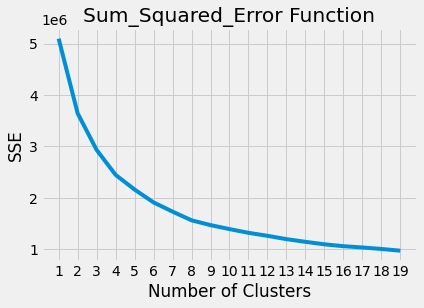

In [151]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Sum_Squared_Error Function")
plt.show()

In [152]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")

In [153]:
kmeans = KMeans(n_clusters=kl.elbow, **kmeans_kwargs)
clusters = kmeans.fit_predict(data2)

In [154]:
'''add clusters to original dataset and replace number with string in Music Segments column'''
data["Music Segments"] = clusters
MinMaxScaler(data["Music Segments"])
for number in range(0, kl.elbow+1):
    data.loc[data["Music Segments"] == number, "Music Segments"] = "Cluster " + str(number+1)

In [155]:
print(data.head())

                    Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity  \
0       68           

In [156]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music Segments"].unique()):


    PLOT.add_trace(go.Scatter3d(x = data[data["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music Segments"] == i]['Energy'],
                                z = data[data["Music Segments"] == i]['Danceability'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'white'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'white'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'white')),
                   font = dict(family = "Gilroy", color  = 'white', size = 12))